# Ensemble Methods on AirBnB 🦾🦾

# Faire du voting et du stacking !

Two popular boosting algorithms are Adaboost and XGBoost, the goal of this exercise is to apply them both to a prediction problem and evaluate their performance with different base models. The dataset we will use is that of Airbnb listings in Seattle, the goal is to predict the price per night of the listing.
There will be quite a lot of preprocessing to do in this exercise as well as some interesting exploratory analysis and visualization. Do not hesitate to deviate from the questions to explore the data further.

In [1]:
!pip install -q xgboost
!pip install -q s3fs

1. Let's import the usual librairies.

2. Import the ```listings.csv``` dataset from s3 using the following link: https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/Boosting/listings.csv

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

3. There are a lot of columns in this dataset. Display the dataset info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

4. Let's proceed to some visualization, first display the distribution of the price variable. You will have to preprocess it as it is not in a numerical format.

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

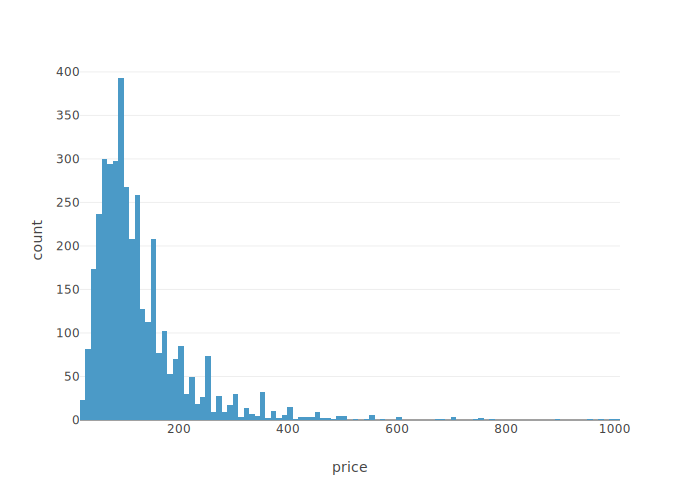

5. The distribution of the target variable is skewed towards high values (this is a very usual situation when working with prices, many items are around the average price range and the higher the price, the fewer items there are). A standard way of working with such variables is to change the scale using the log function so the distribution becomes evenly distributed.
Create a price_log variable that's equal to log(price)

id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609418  -122.354320      2.000000   
50%                     1.000000    47.623601  -122.328874      3.000000   
75%                     3.000000    47.662694  -122.310800      4.000000   
max                   502.000000    47.733358  -122.240607     16.000000   

         bathrooms     bedrooms         beds  square_feet        price  \
count  3802.000000  3812.000000  3817.000000    97.000000  3818.000000   
mean      1.259469     1.307712     1.735394   854.618557   127.976166   
std       0.590369     0.883395     1.139480   671.404893    90.250022   
min       0.000000     0.000000     1.000000     0.000000    20.000000   
25%       1.000000     1.000000     1.000000   420.000000    75.000000   
50%       1.000000     1.000000     1.000000   750.000000   100.000000   
75%       1.000000     2.000000     2.000000  1200.000000   150.000000   
max       8.000000     7.000000    15.000000  3000.000000  1000.000000   

       guests_included  minimum_nights  maximum_nights  availability_30  \
count      3818.000000     3818.000000     3818.000000      3818.000000   
mean          1.672603        2.369303      780.447617        16.786276   
std           1.311040       16.305902     1683.589007        12.173637   
min           0.000000        1.000000        1.000000         0.000000   
25%           1.000000        1.000000       60.000000         2.000000   
50%           1.000000        2.000000     1125.000000        20.000000   
75%           2.000000        2.000000     1125.000000        30.000000   
max          15.000000     1000.000000   100000.000000        30.000000   

       availability_60  availability_90  availability_365  number_of_reviews  \
count      3818.000000      3818.000000       3818.000000        3818.000000   
mean         36.814825        58.082504        244.772656          22.223415   
std          23.337541        34.063845        126.772526          37.730892   
min           0.000000         0.000000          0.000000           0.000000   
25%          13.000000        28.000000        124.000000           2.000000   
50%          46.000000        73.000000        308.000000           9.000000   
75%          59.000000        89.000000        360.000000          26.000000   
max          60.000000        90.000000        365.000000         474.000000   

       review_scores_rating  review_scores_accuracy  \
count           3171.000000             3160.000000   
mean              94.539262                9.636392   
std                6.606083                0.698031   
min               20.000000                2.000000   
25%               93.000000                9.000000   
50%               96.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                3165.000000            3160.000000   
mean 

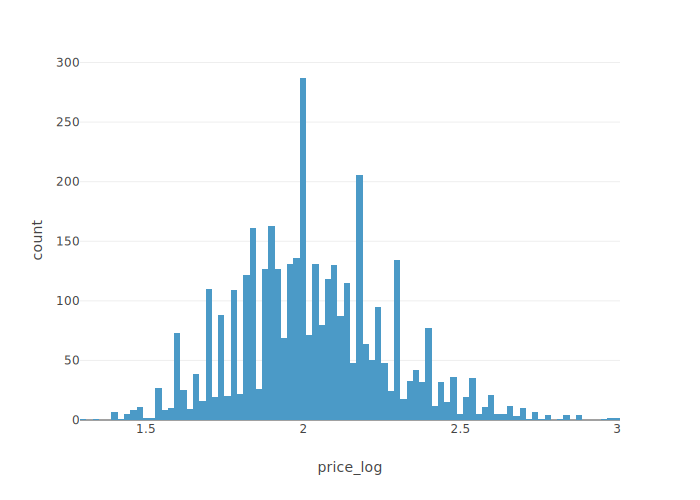

The distribution looks a lot better for prediction purposes after the log transformation!

6. Visualize the price against the following variables : 

- ```room type```
- ```beds```
- ```property type```

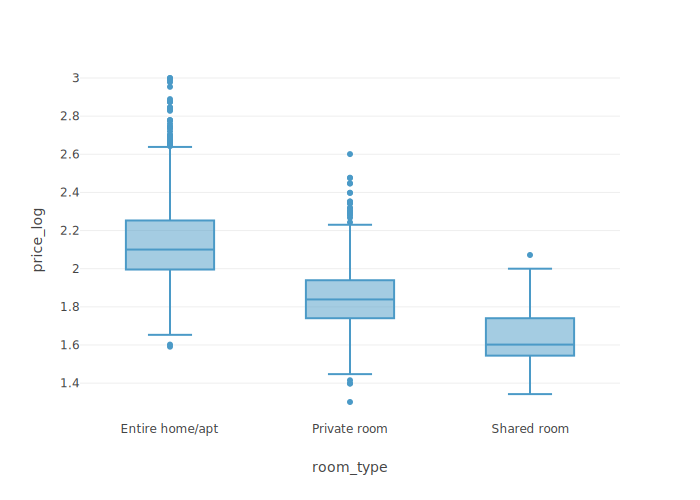

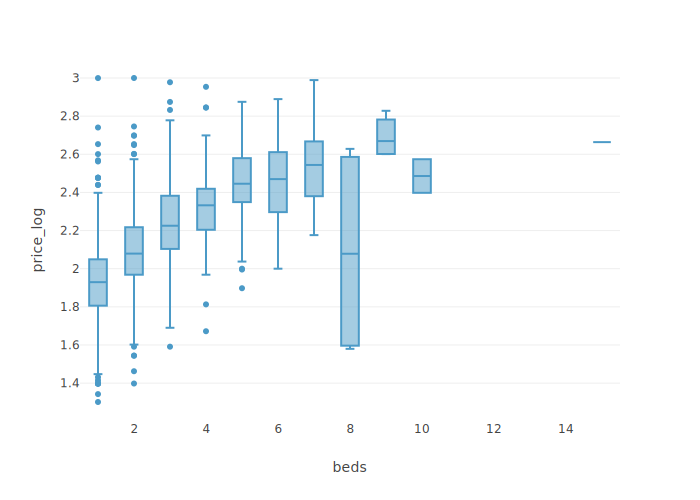

id                           listing_url       scrape_id  \
935   7344117  https://www.airbnb.com/rooms/7344117  20160104002432   
997   8424532  https://www.airbnb.com/rooms/8424532  20160104002432   
1069  6119821  https://www.airbnb.com/rooms/6119821  20160104002432   
1073  8212989  https://www.airbnb.com/rooms/8212989  20160104002432   

     last_scraped                              name  \
935    2016-01-04  SUPER TALL, 5-Level Loft, 2200sf   
997    2016-01-04     Ideal Home for Small Reunions   
1069   2016-01-04             Green Tortoise Hostel   
1073   2016-01-04                    Green Tortoise   

                                                summary  \
935   5-level, bright & modern loft with 20' ceiling...   
997   Lge  home- corner lot -walking distance to Lak...   
1069  Our centrally located Seattle hostel is famous...   
1073  Our centrally located Seattle hostel is famous...   

                                                  space  \
935   Welcome to my 5-story loft located about a lit...   
997                                                 NaN   
1069  Conveniently located at First Avenue and Pike ...   
1073                                                NaN   

                                            description experiences_offered  \
935   5-level, bright & modern loft with 20' ceiling...                none   
997   Lge  home- corner lot -walking distance to Lak...                none   
1069  Our centrally located Seattle hostel is famous...                none   
1073  Our centrally located Seattle hostel is famous...                none   

                                  neighborhood_overview  \
935   We are located at 1820 E Yesler Way in Seattle...   
997                                                 NaN   
1069  The Green Tortoise is located right in the hea...   
1073                                                NaN   

                                                  notes  \
935   There is one compact parking space available i...   
997                                                 NaN   
1069  Towel rentals: $1 Lock rentals: $5 ($3 refunde...   
1073                                                NaN   

                                                transit  \
935   Yep, Seattle is hilly. No worries - the #27 Me...   
997                                                 NaN   
1069  We're located just a few blocks from the LINK ...   
1073                                                NaN   

                                          thumbnail_url  \
935   https://a1.muscache.com/ac/pictures/93184318/2...   
997   https://a0.muscache.com/ac/pictures/107150138/...   
1069  https://a1.muscache.com/ac/pictures/76269495/3...   
1073  https://a0.muscache.com/ac/pictures/106990054/...   

                                             medium_url  \
935   https://a1.muscache.com/im/pictures/93184318/2...   
997   https://a0.muscache.com/im/pictures/107150138/...   
1069  https://a1.muscache.com/im/pictures/76269495/3...   
1073  https://a0.muscache.com/im/pictures/106990054/...   

                                            picture_url  \
935   https://a1.muscache.com/ac/pictures/93184318/2...   
997   https://a0.muscache.com/ac/pictures/107150138/...   
1069  https://a1.muscache.com/ac/pictures/76269495/3...   
1073  https://a0.muscache.com/ac/pictures/106990054/...   

                                         xl_picture_url   host_id  \
935   https://a1.muscache.com/ac/pictures/93184318/2...  38474213   
997   https://a0.muscache.com/ac/pictures/107150138/...    658155   
1069  https://a1.muscache.com/ac/pictures/76269495/3...  31751507   
1073  https://a0.muscache.com/ac/pictures/106990054/...  31751507   

                                        host_url host_name  host_since  \
935   https://www.airbnb.com/users/show/38474213    Jessie  2015-07-14   
997     https://www.airbnb.com/users/show/658155       Joe  2011-06-02   
1069  https://www.airbnb.com/users/show/3175150

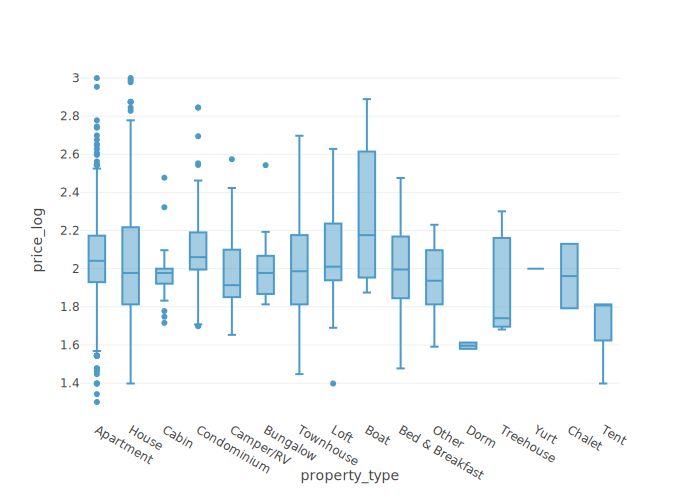

7. Isolate the target variable in an object y and the other variables in an object X

8. We will have to remove a certain number of variables that we do not know how to use at this point. Start by removing the variables that could be interpreted as an ```id``` , we will also remove the variables that contain long texts as we haven't learned about text processing yet. 

We also have to remove all variables related to price, as they represent a risk of leak because of their direct link to the target variable, like ```monthly price```.

A certain number of variables contain a very high amount of missing values, in some cases these missing values correspond to an information we can exploit, sometimes not. Remove these not so useful variables from the dataset, strat by checking the proportion of missing values for all variables.

Your dataset should only contain categorical and numerical variables after this step. Check if your final dataset contains the following variables :

```
Index(['host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')
```

Rate of missing values:


license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_accuracy               17.234154
review_scores_checkin                17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
last_review                          16.422211
first_review                         16.422211
reviews_per_month                    16.422211
space        

9. Are there any remaining missing values ? Is there a relevant way to replace those missing values without using imputing methods ? Are all the variables in a numerical format ? If not run some preprocessing to create a clean dataset.

Remaining missing values:


security_deposit                    51.126244
cleaning_fee                        26.977475
host_acceptance_rate                20.246202
review_scores_checkin               17.234154
review_scores_accuracy              17.234154
review_scores_value                 17.181771
review_scores_location              17.155579
review_scores_cleanliness           17.103195
review_scores_communication         17.050812
review_scores_rating                16.946045
reviews_per_month                   16.422211
host_response_rate                  13.698271
host_response_time                  13.698271
bathrooms                            0.419068
bedrooms                             0.157150
host_since                           0.052383
host_is_superhost                    0.052383
host_listings_count                  0.052383
host_total_listings_count            0.052383
host_has_profile_pic                 0.052383
host_identity_verified               0.052383
property_type                     

Processing cleaning fee...
0        NaN
1     $40.00
2    $300.00
3        NaN
4    $125.00
Name: cleaning_fee, dtype: object
Done.
0      0.0
1     40.0
2    300.0
3      0.0
4    125.0
Name: cleaning_fee, dtype: float64


Processing host_response_rate...
0     96%
1     98%
2     67%
3     NaN
4    100%
Name: host_response_rate, dtype: object
Done.
0    0.96
1    0.98
2    0.67
3     NaN
4    1.00
Name: host_response_rate, dtype: float64


Processing host_acceptance_rate...
0    100%
1    100%
2    100%
3     NaN
4     NaN
Name: host_acceptance_rate, dtype: object
Done.
0    1.0
1    1.0
2    1.0
3    NaN
4    NaN
Name: host_acceptance_rate, dtype: float64


Processing security_deposit...
0          NaN
1      $100.00
2    $1,000.00
3          NaN
4      $700.00
Name: security_deposit, dtype: object
Done.
0       0.0
1     100.0
2    1000.0
3       0.0
4     700.0
Name: security_deposit, dtype: float64


Processing host_has_profile_pic...
0    t
1    t
2    t
3    t
4    t
Name: host_has_profile_pic, dtype: object
Done.
0    t
1    t
2    t
3    t
4    t
Name: host_has_profile_pic, dtype: object


Processing host_identity_verified...
0    t
1    t
2    t
3    t
4    t
Name: host_identity_verified, dtype: object
Done.
0    t
1    t
2    t
3    t
4    t
Name: host_identity_verified, dtype: object


Processing is_location_exact...
0    t
1    t
2    t
3    t
4    t
Name: is_location_exact, dtype: object
Done.
0    t
1    t
2    t
3    t
4    t
Name: is_location_exact, dtype: object


Processing host_response_time...
0    within a few hours
1        within an hour
2    within a few hours
3                   NaN
4        within an hour
Name: host_response_time, dtype: object
Done.
0    within a few hours
1        within an hour
2    within a few hours
3               unknown
4        within an hour
Name: host_response_time, dtype: object


Processing host_is_superhost...
0    f
1    t
2    f
3    f
4    f
Name: host_is_superhost, dtype: object
Done.
0    f
1    t
2    f
3    f
4    f
Name: host_is_superhost, dtype: object


Processing property_type...
0    Apartment
1    Apartment
2        House
3    Apartment
4        House
Name: property_type, dtype: object
Done.
0    Apartment
1    Apartment
2        House
3    Apartment
4        House
Name: property_type, dtype: object


Processing extra_people...
0     $5.00
1     $0.00
2    $25.00
3     $0.00
4    $15.00
Name: extra_people, dtype: object
Done.
0     5.0
1     0.0
2    25.0
3     0.0
4    15.0
Name: extra_people, dtype: float64


Processing host_verifications...
0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object
Done.
0    4
1    6
2    5
3    5
4    5
Name: host_verifications, dtype: int64


Processing host_since...
0    2011-08-11
1    2013-02-21
2    2014-06-12
3    2013-11-06
4    2011-11-29
Name: host_since, dtype: object
Done.
0    3990.0
1    3430.0
2    2954.0
3    3172.0
4    3880.0
Name: host_since, dtype: float64


10. Check that all variables that can can be converted are in numerical format, do not forget to check y as well.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        3816 non-null   float64
 1   host_response_time                3818 non-null   object 
 2   host_response_rate                3295 non-null   float64
 3   host_acceptance_rate              3045 non-null   float64
 4   host_is_superhost                 3818 non-null   object 
 5   host_listings_count               3816 non-null   float64
 6   host_total_listings_count         3816 non-null   float64
 7   host_verifications                3818 non-null   int64  
 8   host_has_profile_pic              3818 non-null   object 
 9   host_identity_verified            3818 non-null   object 
 10  neighbourhood_group_cleansed      3818 non-null   object 
 11  latitude                          3818 non-null   float64
 12  longit

11. Apply ```train_test_split``` to create an X_train X_test y_train and y_test objects. (with random_state = 1)

12. Separate the variables into two groups, one for the numerical variables and one for the categorical variables. And apply preprocessings to each subgroup of variables properly.

Found numeric features  ['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']
Found categorical features  ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'has_availability', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_

13. What score would you expect for a model that would always predict the average price?

R2 baseline train 0.0
R2 baseline test -0.00014016020169149712


14. Train an Adaboost model with all its default parameters, what's the score ?


R2 Adaboost default train 0.6619918966721401
R2 Adaboost default test 0.6565080337984193


15. Train an XGBoost model with all its default parameters except max_depth=3 (the same as adaboost default), what's the score ?

R2 XGBoost default train 0.866199262674102
R2 XGBoost default test 0.756313204762493


16. Adaboost does not seem to be performing as well as XGBoost, however it does not seem to overfit the data as much, try and improve it by playing with its parameters ```learning rate``` & ```n_estimators``` thanks to a grid search

Grid search...
{'n_estimators': [50, 100, 150, 200], 'learning_rate': [1.0, 0.5, 0.1]}
...Done.
Best hyperparameters :  {'learning_rate': 1.0, 'n_estimators': 100}
Best validation R2 :  0.6276666130897123

R2 on training set :  0.6705817371217104
R2 on test set :  0.665629097850122


We don't seem to be able to reach XGBoost performance using Adaboost in this case

17. Let's now run a sanity check to make sure that Adaboost and XGBoost actually improved the performance of their base models which are regression trees in this case. Train a regression tree model with max_depth = 3 (the default for Adaboost)

R2 Tree max depth 3 train 0.5883192169975924
R2 Tree max depth 3 test 0.6034582067623898


We conclude here that both boosting algorithms have fulfilled their missions, they both were able to improve performance on the test set compared to the base model! However XGBoost seems to have superior performance in this case despite higher levels of over fitting.

18. Train separately three independent models, and then implement a voting. Do you get better results?

Grid search...
...Done.
Best hyperparameters :  {'alpha': 50.0}
Best validation R2 :  0.6763480392571379

R2 on training set :  0.704023275812537
R2 on test set :  0.6895123956567402


Grid search...
...Done.
Best hyperparameters :  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best validation R2 :  0.5722125753256275

R2 on training set :  0.5883192169975925
R2 on test set :  0.6034582067623897


Grid search...
...Done.
Best hyperparameters :  {'C': 1.0, 'gamma': 0.1}
Best validation R2 :  0.5074308255077966

R2 on training set :  0.8931636948400286
R2 on test set :  0.5287030301129698


R2 on training set :  0.9173581080623087
R2 on test set :  0.7064525681275096


19. Try a stacking method and conclude about the best model.

Training stacking regressor...
...Done.


logistic      tree       svm
0     1.984251  2.301030  2.206880
1     1.861239  1.544068  1.810204
2     1.917189  1.875061  1.975256
3     1.861129  1.845098  1.927074
4     1.938224  1.954243  1.931660
...        ...       ...       ...
3049  2.413910  2.260071  2.283180
3050  1.982064  1.977724  1.877633
3051  2.057843  2.079181  2.060519
3052  2.000382  1.954243  2.018037
3053  1.991365  2.060698  1.960467

[3054 rows x 3 columns]

R2 on training set :  0.8813329588481283
R2 on test set :  0.7217274226701358


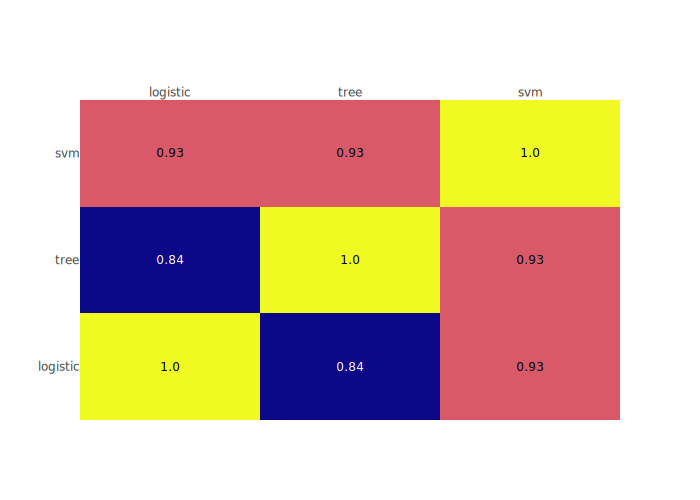

**The tree model is very correlated to the other ones. Let's drop it and see if it improves the performances.**

Training stacking regressor...
...Done.


liear       svm
0     1.984251  2.206880
1     1.861239  1.810204
2     1.917189  1.975256
3     1.861129  1.927074
4     1.938224  1.931660
...        ...       ...
3049  2.413910  2.283180
3050  1.982064  1.877633
3051  2.057843  2.060519
3052  2.000382  2.018037
3053  1.991365  1.960467

[3054 rows x 2 columns]

R2 on training set :  0.8270313086077774
R2 on test set :  0.7168220752608871
